In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Police_df = pd.read_csv('C:/Users/DeAndre/Documents/GitHub/SFPD-Police-Data-Project/data/processed/Joined Data 1.csv', low_memory = False)

In [3]:
Police_df.isnull().sum()

Supervisor District                23991
Incident Datetime                  23991
Incident Date                      23991
Incident Time                      23991
Incident Year                      23991
                                   ...  
Journey to Work: Bike              23991
Journey to Work: Walk              23991
Journey to Work: Other             23991
Journey to Work: Worked at Home    23991
Population Density per Acre        23991
Length: 133, dtype: int64

In [4]:
X = Police_df.drop(Police_df.columns[[1, 2, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33]], axis=1)


In [5]:
Police_df.head()

,Supervisor District,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,...,Workers 16 Years and Older,Journey to Work: Car,Journey to Work: Car - Drove Alone,Journey to Work: Car - Carpooled,Journey to Work: Transit,Journey to Work: Bike,Journey to Work: Walk,Journey to Work: Other,Journey to Work: Worked at Home,Population Density per Acre
0,1.0,12/16/2018 16:45,12/16/2018,16:45,2018.0,Sunday,12/16/2018 17:44,7.486741e+10,748674.0,180946764.0,...,0.018777,0.615385,0.65625,0.5,0.461538,0.375,0.151515,0.25,0.625,0.215596
1,1.0,11/8/2018 21:54,11/8/2018,21:54,2018.0,Thursday,11/8/2018 21:55,7.354367e+10,735436.0,180850137.0,...,0.018777,0.615385,0.65625,0.5,0.461538,0.375,0.151515,0.25,0.625,0.215596
2,1.0,3/18/2019 9:00,3/18/2019,9:00,2019.0,Monday,3/18/2019 12:36,7.809743e+10,780974.0,190193892.0,...,0.018777,0.615385,0.65625,0.5,0.461538,0.375,0.151515,0.25,0.625,0.215596
3,1.0,1/18/2018 11:47,1/18/2018,11:47,2018.0,Thursday,1/18/2019 11:59,7.606583e+10,760658.0,190043485.0,...,0.018777,0.615385,0.65625,0.5,0.461538,0.375,0.151515,0.25,0.625,0.215596
4,1.0,2/10/2019 7:40,2/10/2019,7:40,2019.0,Sunday,2/12/2019 12:15,7.693373e+10,769337.0,190107100.0,...,0.018777,0.615385,0.65625,0.5,0.461538,0.375,0.151515,0.25,0.625,0.215596


While the columns for Supervisor District characteristics are all numerical values, the columns from the original incident report dataset are a mixture of strings and floats. So to make them more suitable for analysis, we will have to make them into numeric values as well. SKlearn has just the package for this.

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
X_category = [
    'Incident Time',
    'Incident Year',
    'Incident Day of Week',
    'Incident Category',
    'Report Type Code',
    'Police District',
    'Analysis Neighborhood',
]

for col in X_category:
    X[col] = le.fit_transform(X[col].astype("str"))

What we did here is select the columns that were non-numeric data values and make each individual entry basically as different levels of a factor.

In [8]:
X.head()

,Supervisor District,Incident Time,Incident Year,Incident Day of Week,Report Type Code,Incident Category,Police District,Analysis Neighborhood,Neighborhoods,Total Population,...,Workers 16 Years and Older,Journey to Work: Car,Journey to Work: Car - Drove Alone,Journey to Work: Car - Carpooled,Journey to Work: Transit,Journey to Work: Bike,Journey to Work: Walk,Journey to Work: Other,Journey to Work: Worked at Home,Population Density per Acre
0,1.0,465,0,3,0,18,7,15,5.0,0.645639,...,0.018777,0.615385,0.65625,0.5,0.461538,0.375,0.151515,0.25,0.625,0.215596
1,1.0,834,0,4,0,29,7,25,5.0,0.645639,...,0.018777,0.615385,0.65625,0.5,0.461538,0.375,0.151515,0.25,0.625,0.215596
2,1.0,1380,1,1,0,21,7,25,8.0,0.645639,...,0.018777,0.615385,0.65625,0.5,0.461538,0.375,0.151515,0.25,0.625,0.215596
3,1.0,167,0,4,0,29,7,25,8.0,0.645639,...,0.018777,0.615385,0.65625,0.5,0.461538,0.375,0.151515,0.25,0.625,0.215596
4,1.0,1300,1,3,0,21,6,25,5.0,0.645639,...,0.018777,0.615385,0.65625,0.5,0.461538,0.375,0.151515,0.25,0.625,0.215596


We can see this above. Values that were previously strings are now numbers.

In [8]:
X_new = X.dropna(axis = 0, how = 'any')

In [9]:
Y= X_new['Incident Category']

In [10]:
X_rnd = X_new.drop('Incident Category', axis = 1)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 100, verbose = 1)

For our Random Forest Classifier, we're going to just use default hyperparameters for now.

Next, we'll split our data into a training set and test set.

In [11]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X_rnd, Y, test_size = 228277, random_state = 3)

Now, we shall build our initial model using our training data set.

In [13]:
model = rnd_clf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


In [14]:
yhat = rnd_clf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.2s finished


In [15]:
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.275


Text(0.5, 0, 'Random Forest Feature Importance')

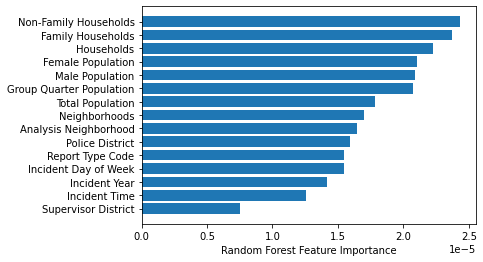

In [61]:
model.feature_importances_
important_features = np.sort(model.feature_importances_)[:15]
sorted_idx = important_features.argsort()
plt.barh(X_rnd.columns.values[sorted_idx], important_features[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [18]:
import time
from sklearn.inspection import permutation_importance
start_time = time.time()
result = permutation_importance(
    model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=1)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   30.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   39.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   49.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   43.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   44.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Elapsed time to compute the importances: 69875.359 seconds


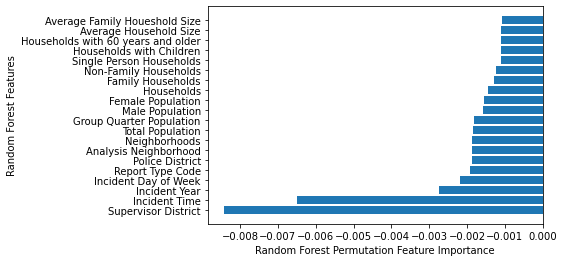

<Figure size 432x288 with 0 Axes>

In [76]:
important_permeutation_features_mean = np.sort(result['importances_mean'])[:20]
important_permeutation_features_std = np.sort(result['importances_mean'])[:20]
important_permeutation_features_importances = np.sort(result['importances'])[:20]
sorted_idx = important_permeutation_features_mean.argsort()
plt.barh(X_rnd.columns.values[sorted_idx], important_permeutation_features_mean[sorted_idx])
plt.xlabel("Random Forest Permutation Feature Importance")
plt.ylabel("Random Forest Features")
plt.show()
plt.savefig('Permutation Feature Importance')

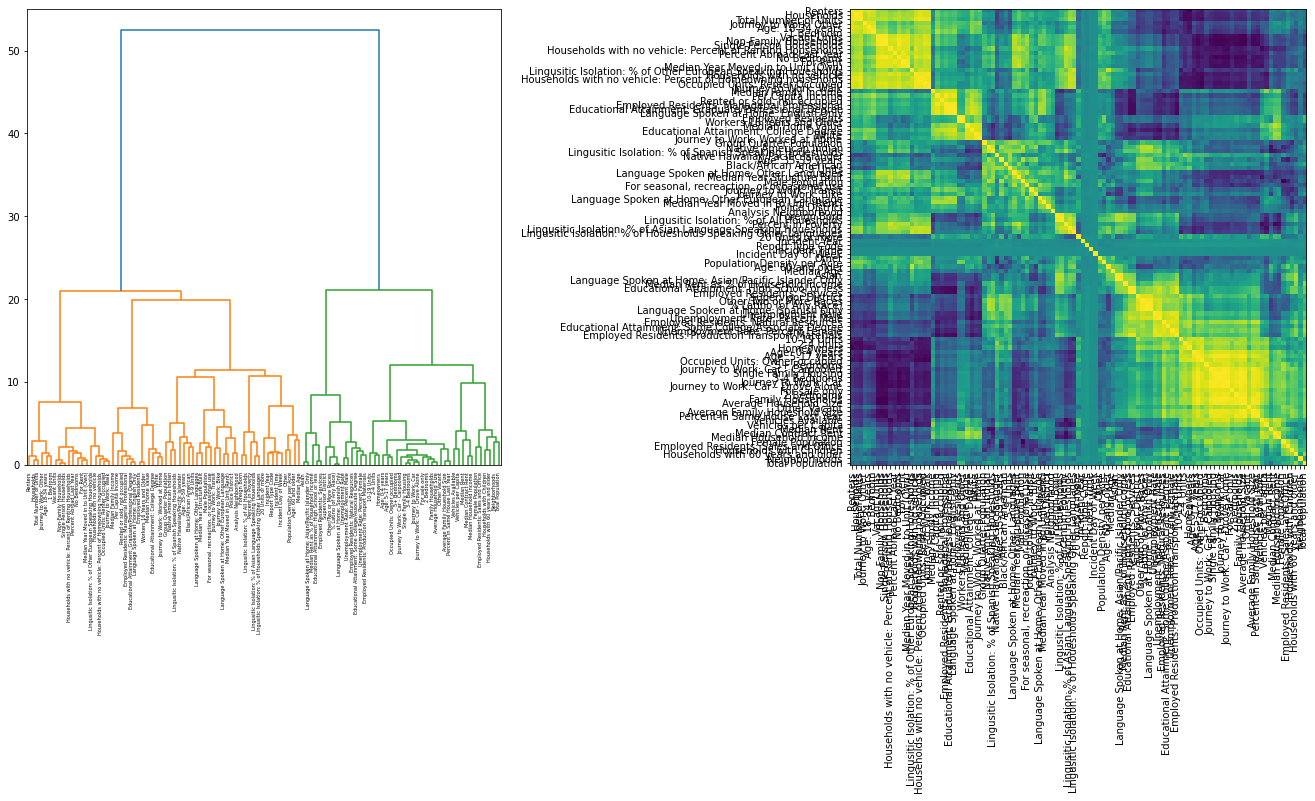

In [68]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18.5, 10.5))
corr = spearmanr(X_rnd).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=X_rnd.columns.values.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.savefig('Hierarchy')
plt.show()

In [75]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")

MemoryError: Unable to allocate 7.02 GiB for an array with shape (100, 188409, 50) and data type float64

In [ ]:
shap.summary_plot(shap_values, x_test)

Once you determine feature importance:
1. You can drop unimportnat features/columns
2. Create new feature columns in dataset
3. Redefine accuracy (Top 3 most likely incident codes)
4. Based upon makeup of Supervisor district, predict the prevalence of incident types and incident frequency across districts